# DIAMOND CLUSTERING

<img src="https://www.londongold.com/media/uploads/real%20diamonds.jpg" alt="Dataset Cover">

* Bu projed elmasları niteliklerine göre kümeleyeceğiz yani Clustering yapacağız. Veri kümesi karat, kesim, renk, berraklık, derinlik, tablo, fiyat ve boyutlar (x, y, z) gibi temel özellikleri içeriyor. Clustering algoritmaları uygulayarak, elmaslar arasındaki kalıpları ve benzerlikleri ortaya çıkarmaya çalışacağız.

In [1]:
#!pip install yellowbrick

In [2]:
import pandas as pd
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## EDA

In [3]:
diamond=pd.read_csv("diamonds.csv")

In [4]:
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
del diamond["Unnamed: 0"] # gereksiz sutun, silelim.

In [6]:
diamond.shape

(53940, 10)

In [7]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
diamond['cut'].unique() # 6 çeşit kesimli elmas var

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [10]:
diamond['color'].unique() # elmasın rengi, en iyi renk D,E,F,G,H,I,F

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [11]:
diamond['clarity'].unique()
# Elmasın berraklık derecelendirmesi (clarity), iç ve dış kusurların sayısını ve görünürlüğünü belirler.
# sıralama IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [12]:
diamond["price"].unique()

array([ 326,  327,  334, ..., 2753, 2755, 2756], dtype=int64)

In [13]:
diamond["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

## DATA VISUALIZATION

In [14]:
d={'Ideal':0,'Premium':1,'Very Good':2,'Good':3,'Fair':4,}

In [15]:
diamond['cut']=diamond['cut'].map(d)

In [16]:
d={'IF':0,'VVS1':1,'VVS2':2,'VS1':3,'VS2':4,'SI1':5, 'SI2':6, '2I1':7,}

In [17]:
diamond['clarity']=diamond['clarity'].map(d)

In [18]:
d={'D':0,'E':1,'F':2,'G':3,'H':4,'I':5, 'J':6,}

In [19]:
diamond['color']=diamond['color'].map(d)

In [20]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,6.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,5.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,3.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,4.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,6,6.0,63.3,58.0,335,4.34,4.35,2.75


In [21]:
x=diamond[['carat','cut','color','price']]
# clustering yapacağız yani elmalsarı bu özelliklere göre kümeleyeceğiz

In [22]:
x.head()

,carat,cut,color,price
0,0.23,0,1,326
1,0.21,1,1,326
2,0.23,3,1,327
3,0.29,1,5,334
4,0.31,3,6,335


In [23]:
model=KMeans(4)

In [24]:
model=model.fit(x)

In [25]:
tahmin=model.predict(x)

In [26]:
x['cluster']=tahmin

In [27]:
x

,carat,cut,color,price,cluster
0,0.23,0,1,326,0
1,0.21,1,1,326,0
2,0.23,3,1,327,0
3,0.29,1,5,334,0
4,0.31,3,6,335,0
...,...,...,...,...,...
53935,0.72,0,0,2757,0
53936,0.72,3,0,2757,0
53937,0.70,2,0,2757,0
53938,0.86,1,4,2757,0


In [28]:
silhouette_score(x,tahmin)

0.6503203749543354

In [29]:
#grupların birbirine uzaklığını hesaplar, 2 den 5 a kadar olan her k değeri için silhouete score gösterir
wcss=[]
ss=[]
for i in range(2,5): #en az iki olmak zorunda o yüzden 1
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.7078461640529189
0.6602789309766566
0.650207678146831


1. sayı 2 küme için hesaplanan silhouette skorudur. Yüksek bir değer (1'e yakın) olduğundan, kümeler arasında iyi bir ayrım olduğunu gösterir.
2. sayı 3 küme için hesaplanan silhouette skorudur. Değer biraz daha düşük, ancak hala kabul edilebilir düzeyde.
3. sayı 4 küme için hesaplanan silhouette skorudur. Bu değer, önceki değere göre biraz daha düşüktür, bu da 4 kümenin, 3 kümeye göre daha az belirgin olduğunu gösterir.

* Silhouette Skorları küme sayısının artmasıyla birlikte genellikle düşme eğiliminde. Bu, daha fazla kümenin, veriyi daha iyi ayıramadığı anlamına gelebilir.

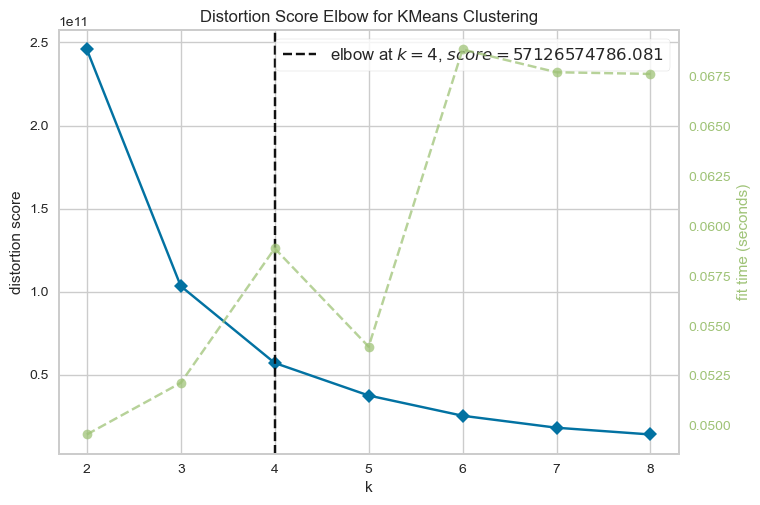

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
#optimum küme sayısını görselleştirelim
km=KMeans()
vis=KElbowVisualizer(km,k=(2,9))
vis.fit(x)
vis.show()

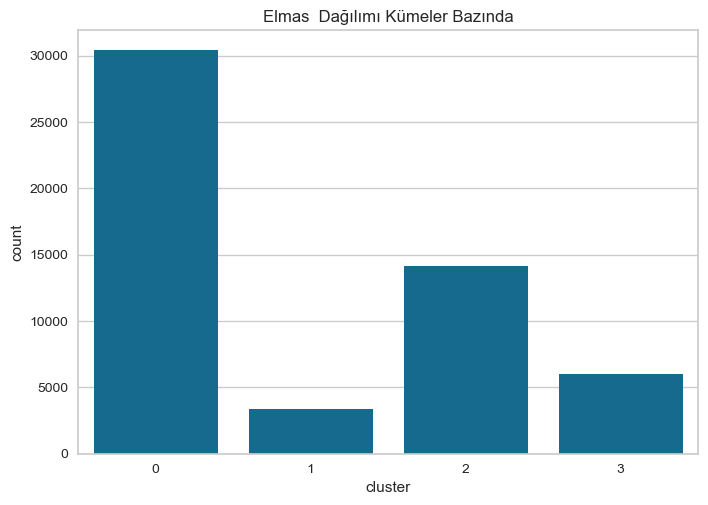

In [31]:
# Elmas Dağılımı Kümeler Bazında
ax = sns.countplot(data=x, x='cluster')
ax.set_title('Elmas  Dağılımı Kümeler Bazında')
plt.show()

In [32]:
cluster_labels = model.labels_
diamond['Cluster'] = cluster_labels

# Her kümedeki elmasları listele
for i in range(4):
    print(f"Cluster {i+1}:")
    print(diamond[diamond['Cluster'] == i]['clarity'].tolist())
    print()  

Cluster 1:
[326, 326, 327, 334, 335, 336, 336, 337, 337, 338, 339, 340, 342, 344, 345, 345, 348, 351, 351, 351, 351, 352, 353, 353, 353, 354, 355, 357, 357, 357, 402, 402, 402, 402, 402, 402, 402, 402, 403, 403, 403, 403, 403, 403, 403, 403, 403, 403, 404, 404, 404, 404, 404, 404, 404, 405, 405, 405, 405, 405, 552, 552, 552, 552, 552, 553, 553, 553, 553, 553, 553, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 2757, 2757, 2757, 2759, 2759, 2759, 2759, 2759, 2760, 2760, 2760, 2760, 2760, 2760, 2760, 2760, 2760, 2761, 2761, 2761, 2761, 2761, 2761, 2762, 2762, 2762, 2762, 2762, 2762, 2762, 2762, 2762, 2762, 2762, 2762, 2762, 2763, 2763, 2763, 2763, 2763, 2764, 2764, 2765, 2765, 2765, 2765, 2765, 2765, 2766, 2766, 2766, 2767, 2767, 2767, 2767, 2768, 2768, 2768, 2768, 2768, 2769, 2770, 2770, 2770, 2770, 2770, 2770, 2770, 2770, 2770, 2771, 2771, 2771, 2771, 2772, 2772, 2772, 2772, 2772, 2773, 2773, 2774, 2774, 2774, 2774, 2775, 2776, 2776, 2776

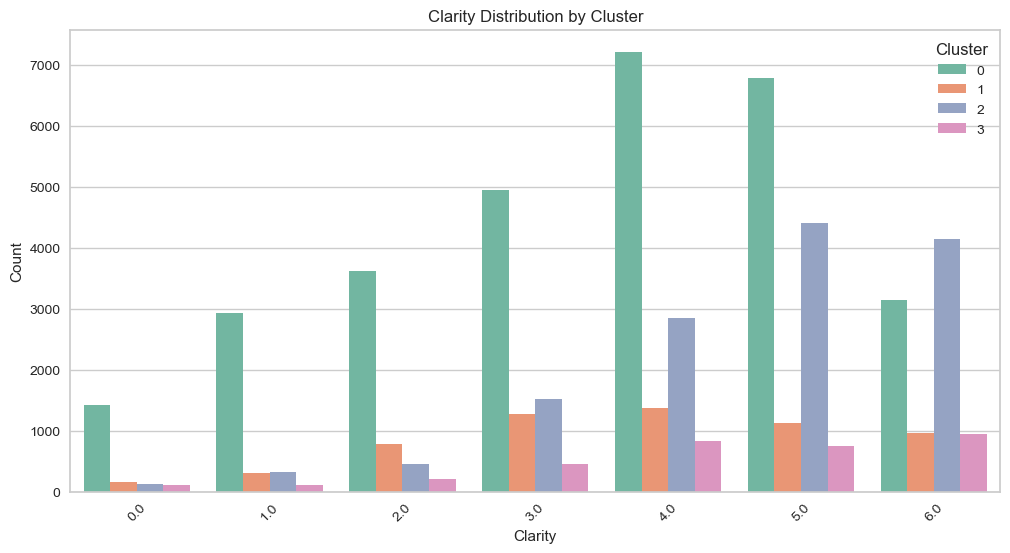

In [35]:
# Küme etiketlerini içeren yeni DataFrame oluşturma
diamond['Cluster'] = cluster_labels

# Küme ve Clarity dağılımını görselleştirme
plt.figure(figsize=(12, 6))
sns.countplot(x='clarity', hue='Cluster', data=diamond, palette='Set2')
plt.title('Clarity Distribution by Cluster')
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

In [36]:
# Elmasların küme atamaları
cluster_labels = model.labels_
diamond['Cluster'] = cluster_labels

# Her kümedeki price sayılarını yazdır
for i in range(4):
    cluster_size = len(diamond[diamond['Cluster'] == i])
    print(f"Cluster {i+1} clarity {cluster_size}")

Cluster 1 clarity 30363
Cluster 2 clarity 6036
Cluster 3 clarity 14135
Cluster 4 clarity 3406


* Elmas seçimi için clarity yani berraklık çok önemlidir, projemizde modelimiz elmas verilerinin clarity özelliklerine göre 4 farklı kümeye ayırdı ve her grupta bulunan elmas sayısını belirtti. model.labels_ kullanılarak her bir elmasın hangi kümeye ait olduğu belirledi.